=====================================================================================================================
<b>
<center>
    <h1>DIABETES READMISSION AND EFFECTIVE TREATMENT PREDICTION</h1> <br>
    <h2>Final Project - Machine Learning I - Spring 2020 </h2><br>
</center>
=====================================================================================================================
<div align="right">
    By:Madhuri Yadav, Sharmin Kantharia, Trinh Vu
</div>
</b>



## Purpose:
   The purpose of this report is to identify whether a patient will be readmitted in some hospital and the possible treatment given to the patient in order to change the treatment, to avoid a readmission.
    
## Summary:
   With the increasing number of diabetic patients in US it is important to consider the readmissions of the patients to the hospitals within 30 days of discharge and the treatments given to them as early readmission adds burden of penalty to the hospitals. This project provides thorough analysis of factors that might affect early readmission of the patients using method like Random Forest for feature importance. Further it provides the prediction of whether the patient will be early readmitted, and the possible treatments given in early cases using Diabetes 130 US hospitals for years 1999-2008 dataset and by making use of various supervised machine learning algorithms in order to reduce rate of early readmission in the future.
    
## Introduction:
   Diabetes and complications, deaths, and societal costs associated with diabetes have a huge and rapidly growing impact on the United States. Between 1990 and 2010 the number of people living with diabetes tripled and the number of new cases annually doubled. Hence hospital readmission of diabetic patients has become a high-priority health care quality measure and target for cost reduction, particularly within 30 days of discharge also called as 30-day readmission/early readmission. Rubin, D.J. in his article about Hospital Readmission of Patients with Diabetes says the burden of diabetes among hospitalized patients, is substantial, growing, and costly, and readmissions contribute a significant portion of this burden. Factors such as male gender, comorbidity burden, hospital length of stay, government insurance vs. private or no insurance, emergent or urgent vs. elective admission, recent prior hospitalization, and being discharged against medical advice are associated with an increased risk of 30-day readmission. Hospitalized patients with diabetes may be at higher risk of readmission than those without diabetes. Despite broad interest in readmission, relatively little research has focused on patients with diabetes. Hence, reducing readmission rates among patients with diabetes has the potential to greatly reduce health care costs while simultaneously improving care.
    
## Smart Question:
   To Predict the early readmission of diabetic patients and to predict the effective treatment given to a diabetic patient based on various features like Race, gender, age, Medication, A1CResults, etc.

## Method:
### Data
   In this study we have used Diabetes 130 US hospitals for years 1999-2008 dataset from Kaggle[(link)](https://www.kaggle.com/brandao/diabetes). The main source for this data set is UCI Machine Learning Repository [(link)](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University. The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing total of 101,766 patient and hospital outcomes. The size of the dataset is 18MB. The data contains attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc. refer to Data Dictionary in appendix for more details.



### Google Drive

## Target - Readmission

In [109]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set working directory
abspath = '/content/drive/My Drive/Colab Notebooks/ML1/Final Project/'

### Import Packages

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
import pandas as pd
import numpy as np

### Load Data

In [112]:
# data = pd.read_csv('./diabetic_data.csv')
data = pd.read_csv(abspath + 'diabetic_data.csv', header = 0)

### Data Cleaning
#### In the next step we filter out those instances where the medicines/treatments given are for Diabetes. This allows us to work with only those patients who actually have diabetes.

In [113]:
data_diabetic = data[data['diabetesMed']=='Yes']

In [114]:
# Create a copy of the final usable dataframe
df = data_diabetic.copy(deep=True)

# Display the first 5 instances
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [115]:
# Display the rows and columns in df
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,78363,50


In [116]:
# List the columns to understand the data
df.columns
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [117]:
# Understand the description of the data and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78363 entries, 1 to 101764
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              78363 non-null  int64 
 1   patient_nbr               78363 non-null  int64 
 2   race                      78363 non-null  object
 3   gender                    78363 non-null  object
 4   age                       78363 non-null  object
 5   weight                    78363 non-null  object
 6   admission_type_id         78363 non-null  int64 
 7   discharge_disposition_id  78363 non-null  int64 
 8   admission_source_id       78363 non-null  int64 
 9   time_in_hospital          78363 non-null  int64 
 10  payer_code                78363 non-null  object
 11  medical_specialty         78363 non-null  object
 12  num_lab_procedures        78363 non-null  int64 
 13  num_procedures            78363 non-null  int64 
 14  num_medications      

### Modify the DataFrame
- As we can see through the EDA, the columns that we drop in the next cell, either had the maximum missing values or were, as per the problem statement, not relevant features for prediction purposes.

In [118]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var][df[var] == '?'].count()/ df.shape[0], df[var].dtype]
                           for var in df.columns if df[var][df[var] == '?'].count() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [119]:
# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,weight,0.971913,object
1,medical_specialty,0.484502,object
2,payer_code,0.375356,object
3,race,0.023876,object
4,diag_3,0.014420,object
5,diag_2,0.003841,object
6,diag_1,0.000191,object


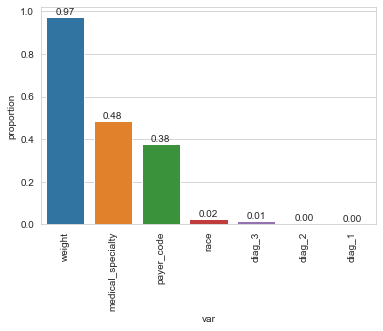

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x = 'var', y = 'proportion', data=df_nan)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax..set_title('Features with missing data')
plt.xticks(rotation = 90)
plt.show()

In [121]:
df = df.drop(columns=['patient_nbr', 'weight', 'medical_specialty', 'payer_code', 
                      'diag_1', 'diag_2', 'diag_3']).reset_index(drop=True)

In [122]:
# Check for missing values in the remaning columns
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 1871
gender 0
age 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### Feature Engineering

### Race
#### Replace and Impute Missing Values is column 'race'
- From the columns displayed above, we can see that the column 'race' has the most missing values. Since race is a relevant feature, we replace and impute missing values in column 'race'. Missing values in the data are expressed as '?', which are replaced by 'nan'.

In [123]:
# Unique values in column 'race'
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [124]:
# Replace '?' with 'nan' using replace()
df['race'] = df['race'].replace('?', np.nan)

In [125]:
# Verify the unique values
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [126]:
# Categorical Imputer is used to impute the missing values in column 'race' represented by 'nan'
from sklearn_pandas import CategoricalImputer

ci = CategoricalImputer()

df['race'] = ci.fit_transform(df['race'])

In [127]:
# Verify the unique values again
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [128]:
# Display the first 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


### Gender
#### Remove Missing/Invalid Values from column 'gender'
- Column 'gender' has 3 distinct classes - 'Male', 'Female' and 'Unknown/Invalid'. Since we cannot impute such values as gender, we can remove those rows which have gender=='Unknown/Invalid'.

In [129]:
# List the unique values in cloumn 'gender'
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [130]:
# Filter out the missiing/invalid values and save it as the new dataframe
df = df[df['gender']!='Unknown/Invalid']

In [131]:
# Display the fist 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


### Medications/Treatments
#### Custom Encoding for Medications
The dataset contains 23 different drugs which have been given to diabetic patients in different combinations. These columns along with the column 'insulin' have 4 unique values - 'No','Steady','Up','Down'.

- We create a dataframe 'treatment' from the main dataframe with the columns 'encounter_id', 'insulin' and the 23 medications.
- The 4 unique values are replaced as binary:

  - No (0): That particular medication was not given as part of the treatment
  - Steady, Up, Down (1): That particulat medication was given as part of the treatment
  
- We set the index as 'encounter_id' so as to be able to join this dataframe to the original one

In [132]:
# Create dataframe and  encode the 4 unique values
treatment = df[['encounter_id','insulin','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

treatment = treatment.replace(['No','Steady','Up','Down'],[0,1,1,1])

# Set index
treatment.set_index('encounter_id', inplace =True)

# Display first 5 instances
treatment.head()

,insulin,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64410,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35754,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Sum total of the different combinations of medication given
treatment.sum(axis=1).value_counts()

1    47314
2    21871
3     7778
4     1335
5       58
6        5
dtype: int64

####  When insulin is given (insulin = 1), there are maximum of 6 combinations of medicines given.
  - 1 implies only insulin is given as treatment
  - 2-6 implies a combination of medication including insulin and the remaining 23, insulin+others (io), are given as treatment

In [134]:
# Sum total of the different combinations of medication given, when insulin is given
treatment[treatment['insulin']==1].sum(axis=1).value_counts()

1    30965
2    15437
3     6625
4     1295
5       57
6        4
dtype: int64

#### When insulin is given (insulin = 0), there are maximum of 6 combinations of medicines given.
  - 1 implies only one of the 23 medications are given as treatment
  - 2-6 implies a combination of the 23 medications are given as treatment

In [135]:
# Sum total of the different combinations of medication given, when insulin is not given
treatment[treatment['insulin']==0].sum(axis=1).value_counts()

1    16349
2     6434
3     1153
4       40
6        1
5        1
dtype: int64

#### The different combinations of the medications in both cases (insulin=1 and insulin=0) are replaced with 3 unique categories
  - insulin
  - io
  - other

In [136]:
# When insulin is given
insulin = treatment[treatment['insulin']==1].sum(axis=1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])

In [137]:
# When insulin is not given
no_insulin = treatment[treatment['insulin']==0].sum(axis=1).replace([1,2,3,4,5,6],['other','other','other','other','other','other'])

##### Concatenate the 2 columns - insulin and no_insulin and create a new column in 'treatment' dataframe called 'treatment'

In [138]:
treatment = pd.concat([insulin, no_insulin])
treatment = pd.DataFrame({'treatment':treatment})

In [139]:
# Display the frist 5 instances
treatment.head()

,treatment
encounter_id,
149190,insulin
500364,insulin
16680,io
35754,insulin
55842,io


In [140]:
# Add the new column 'treatment' to the original data frame using .join(), using 'encounter_id'
df = df.join(treatment, on = 'encounter_id')

# Display the frist 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatment
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,insulin
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,other
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,Steady,No,No,No,No,No,No,Yes,>30,insulin


In [141]:
# Drop the encoded columns from the original dataframe
df = df.drop(columns = ['encounter_id','insulin','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']).reset_index(drop=True)

In [142]:
# Display the frist 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,insulin
1,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,Yes,NO,other
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,insulin
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,io
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,insulin


### EDA

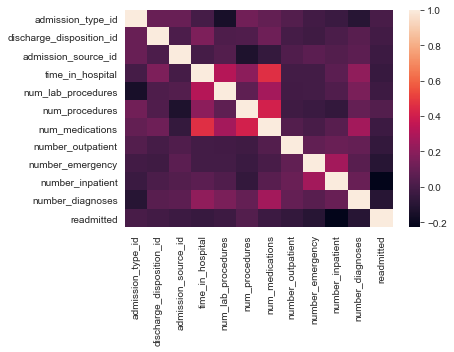

In [143]:
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
ndf = df

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
ndf['readmitted'] = le.fit_transform(ndf['readmitted'].astype(str))
myBasicCorr = ndf.corr()
sns.heatmap(myBasicCorr)
ndf['readmitted'] = le.inverse_transform(ndf['readmitted'])

Text(0.5, 1.0, 'Distribution of Readmission')

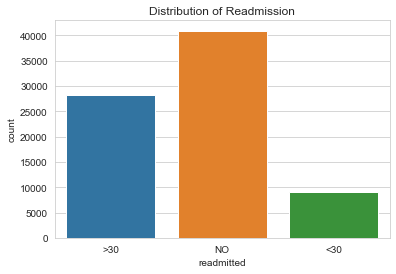

In [144]:
# Count of all three classes for readmission
sns.countplot(df['readmitted']).set_title('Distribution of Readmission')

Text(0.5, 1.0, 'Distribution of Treatment')

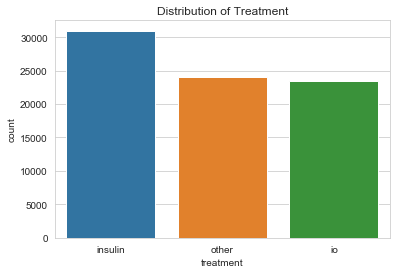

In [145]:
# Count of all three types of treatment i.e. insuline, io and other
sns.countplot(df['treatment']).set_title('Distribution of Treatment')

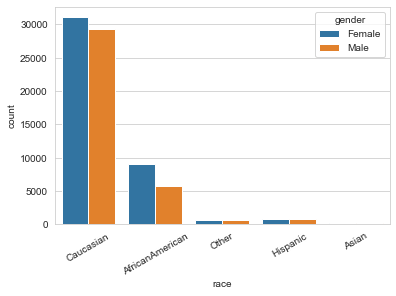

In [146]:
#Race vs Gender 
#from each race which readmitted genders have more diabetic issues)
ax = sns.countplot(x = 'race', data = df, hue="gender")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax

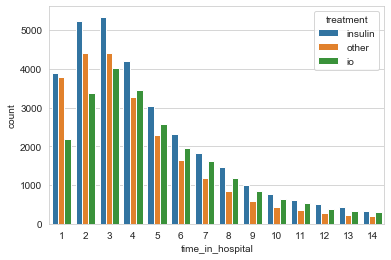

In [147]:
#Time_in_hospital vs Treatment
#to check how many people get readmitted after being discharged for first time
sns.countplot(x="time_in_hospital", hue= 'treatment', data=df)

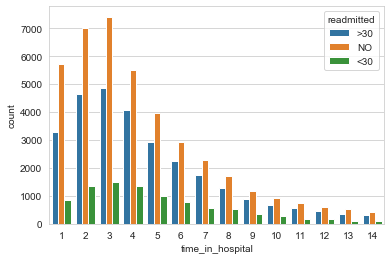

In [148]:
#Time_in_hospital vs readmission 
#to check how many people get readmitted after being discharged for first time
sns.countplot(x="time_in_hospital", hue="readmitted", data=df)

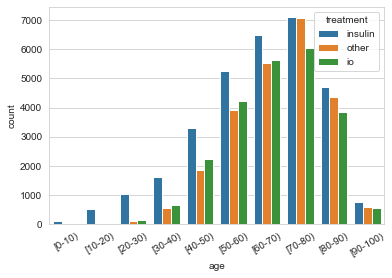

In [149]:
#Treatment vs age
#Which age group has maximum kind of one treatment
ax = sns.countplot(x = 'age', data = df,hue="treatment", order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax

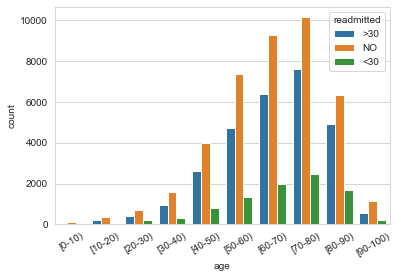

In [150]:
#Readmitted vs age
#Which age group has maximum readmitted entries
ax = sns.countplot(x = 'age', data = df,hue="readmitted", order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax

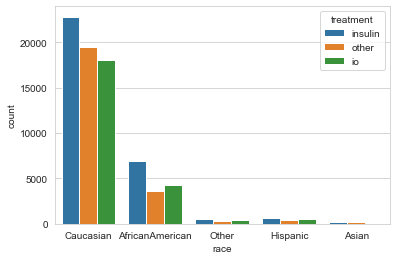

In [151]:
#Race vs Treatment
ax = sns.countplot(x = 'race', data = df, hue = "treatment")

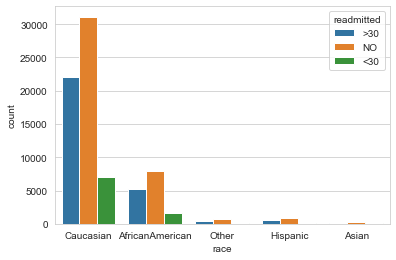

In [152]:
#Race vs Readmitted
ax = sns.countplot(x = 'race', data = df, hue = "readmitted")

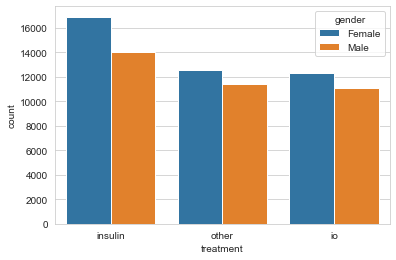

In [153]:
#Gender vs Treatment
ax = sns.countplot(hue = 'gender', data = df, x = "treatment")

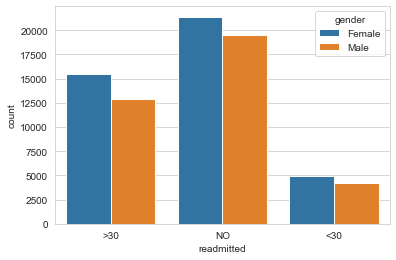

In [154]:
#Gender vs Readmitted
ax = sns.countplot(hue = 'gender', data = df, x = "readmitted")

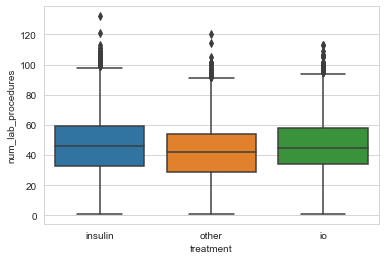

In [155]:
#Num_lab_procedures vs treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'num_lab_procedures', data = df, x = "treatment")

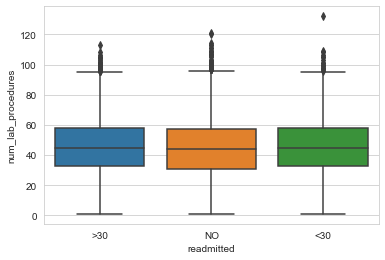

In [156]:
#Num_lab_procedures vs Readmitted
ax = sns.boxplot(y = 'num_lab_procedures', data = df, x = "readmitted")

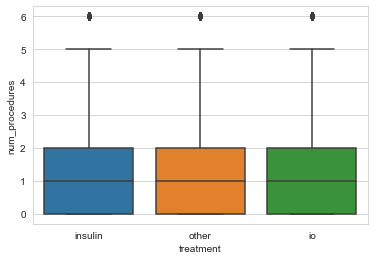

In [157]:
#Num_procedures vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'num_procedures', data = df, x = "treatment")

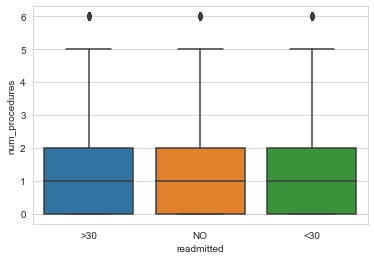

In [158]:
#Num_procedures vs Readmitted
ax = sns.boxplot(y = 'num_procedures', data = df, x = "readmitted")

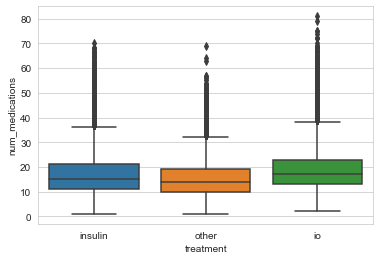

In [159]:
#Num_medications vs treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'num_medications', data = df, x = "treatment")

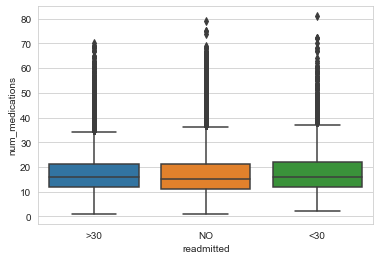

In [160]:
#Num_medications vs Readmitted
ax = sns.boxplot(y = 'num_medications', data = df, x = "readmitted")

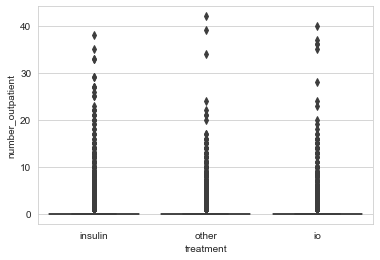

In [161]:
#Num_outpatient vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'number_outpatient', data = df, x = "treatment")

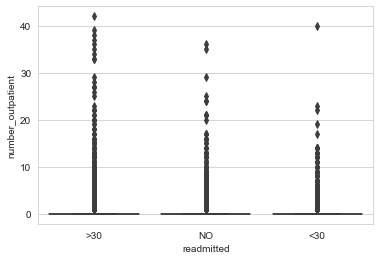

In [162]:
#Num_outpatient vs Readmitted
ax = sns.boxplot(y = 'number_outpatient', data = df, x = "readmitted")

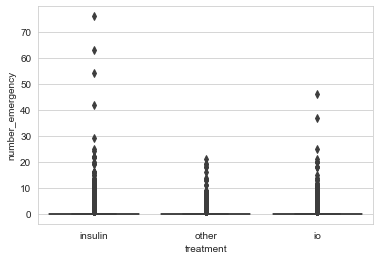

In [163]:
#Num_emergency vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'number_emergency', data = df, x = "treatment")

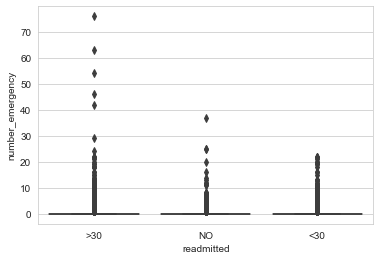

In [164]:
#Num_emergency vs Readmitted
ax = sns.boxplot(y = 'number_emergency', data = df, x = "readmitted")

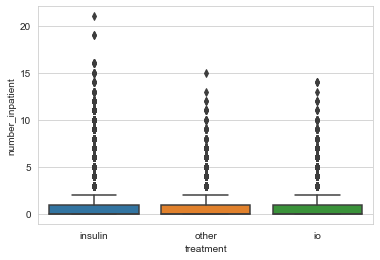

In [165]:
#Num_inpatient vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'number_inpatient', data = df, x = "treatment")

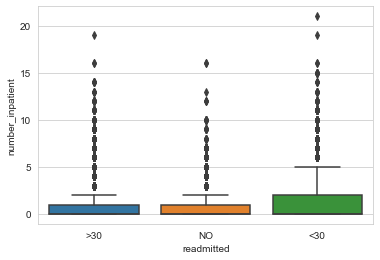

In [166]:
#Num_inpatient vs Readmitted
ax = sns.boxplot(y = 'number_inpatient', data = df, x = "readmitted")

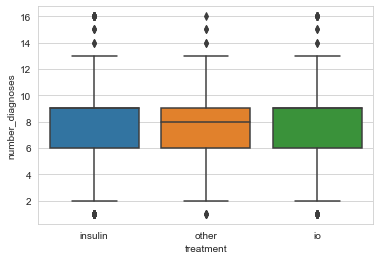

In [167]:
#Num_diagnoses vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.boxplot(y = 'number_diagnoses', data = df, x = "treatment")

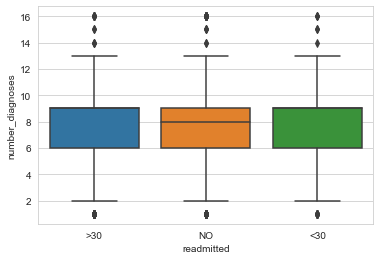

In [168]:
#Num_diagnoses vs Readmitted
ax = sns.boxplot(y = 'number_diagnoses', data = df, x = "readmitted")

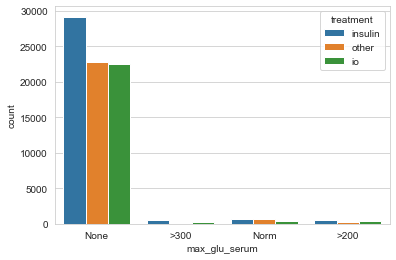

In [169]:
#Max_glu_serum vs Treatment
#to check how many people get readmitted after being discharged for first time
ax = sns.countplot(x = 'max_glu_serum', data = df, hue = "treatment")

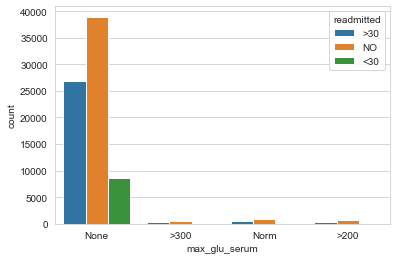

In [170]:
#Max_glu_serum vs Readmitted
ax = sns.countplot(x = 'max_glu_serum', data = df, hue = "readmitted")

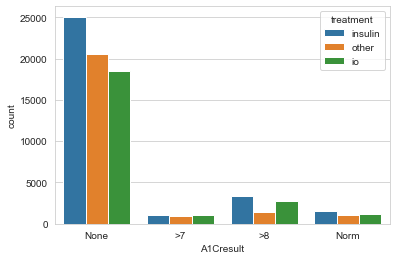

In [171]:
#Alcohol vs Treatment
#What level of alcohol uses which type of treatment

ax = sns.countplot(x = 'A1Cresult', data = df, hue = "treatment")

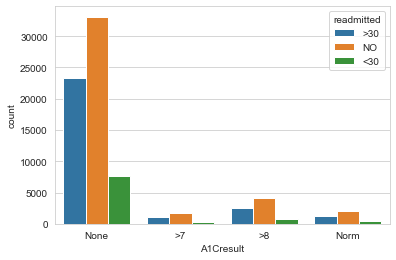

In [172]:
#Alcohol vs Readmission
#What level of alcohol causes most no. of people to be readmitted

ax = sns.countplot(x = 'A1Cresult', data = df, hue = 'readmitted')

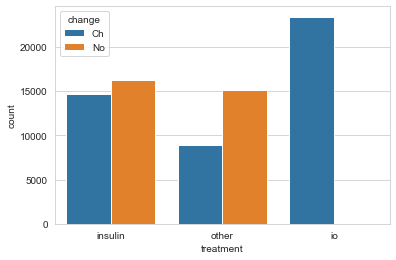

In [173]:
#Change vs Treatment
#What level of alcohol uses which type of treatment

ax = sns.countplot(hue = 'change', data = df, x = "treatment")

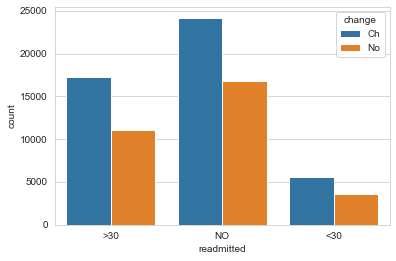

In [174]:
#Change vs Readmission
#What level of alcohol causes most no. of people to be readmitted

ax = sns.countplot(hue = 'change', data = df, x = 'readmitted')

### Age
#### Custom encoding of the categories in column 'age'
- The column 'age' has 10 different categories ranging from 0-70, as shown below.

In [175]:
df['age'].value_counts()

[70-80)     20189
[60-70)     17611
[50-60)     13401
[80-90)     12914
[40-50)      7405
[30-40)      2849
[90-100)     1944
[20-30)      1315
[10-20)       600
[0-10)        133
Name: age, dtype: int64

#### The following function provides the following label/custom categories for age:

- [0-10): 1
- [10-20): 2
- [20-30): 3
- [30-40): 4
- [40-50): 5
- [50-60): 6
- [60-70): 7
- [70-80): 8
- [80-90): 9
- [90-100): 10


In [176]:
# encoding age columns with 10 categories
labels = data['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

# Display the categories
replace_age

{'age': {'[0-10)': 1,
  '[10-20)': 2,
  '[20-30)': 3,
  '[30-40)': 4,
  '[40-50)': 5,
  '[50-60)': 6,
  '[60-70)': 7,
  '[70-80)': 8,
  '[80-90)': 9,
  '[90-100)': 10}}

In [177]:
# Replace each age category with a custom label
df = df.replace(replace_age)

# Display the first 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,Female,2,1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,insulin
1,AfricanAmerican,Female,3,1,1,7,2,11,5,13,2,0,1,6,None,None,No,Yes,NO,other
2,Caucasian,Male,4,1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,insulin
3,Caucasian,Male,5,1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,io
4,Caucasian,Male,6,2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,insulin


### Remaining Categorical Features
#### For the target 'Readmission', we need to perform custom encoding of certain columns:

- Column 'readmitted' has 3 unique values - 'NO', '>30', '<30'. Our aim to predict if the patients get readmitted or not within 30 days. Hence, we encode, 
  - 'No' (patient does not get readmitted) as 0
  - '>30' (patient gets readmitted after 30 days) as 0
  - '<30' (patient gets readmitted within 30 days) as 1.


- Column 'change' has 2 unique values - 'No', 'Ch'. We encode,
    - 'No' (No change in medication) as 0
    - 'Ch' (Change in medication) as 1

- Column 'gender' has 2 unique values - 'Male', 'Female'. We encode,
     - 'Male' as 0
     - 'Female' as 1

- Column 'max_glu_serum' has 4 unique values - 'None', '>300', 'Norm', '>200'. We encode,
    - 'None' (No Glucose Serum test was taken) as -99
    - 'Norm' (Normal test results) as 0
    - '>300' and '>200' (Abnormal test results) as 1

- Column 'A1Cresult' has 4 unique values - 'None', '>7', 'Norm', '>8'. We encode,
    - 'None' (No Hemoglobin test was taken) as -99
    - 'Norm' (Normal test results) as 0
    - '>7' and '>8' (Abnormal test results) as 1

- Column 'treatment' has 3 unique values - 'other', 'insulin', 'io'. We encode,
     - 'other' (A combination of medications not including insulin) as 0
     - 'insulin' (Only insulin is provided as treatment) as 1
     - 'io' (A combination of medications including insulin) as 2

In [178]:
# Encoding column 'readmitted'
df['readmitted'] = df['readmitted'].replace(['NO', '>30', '<30'], [0,0,1])

# Encoding column 'change'
df['change'] = df['change'].replace(['No', 'Ch'], [0,1])

# Encoding column 'gender'
df['gender'] = df['gender'].replace(['Male', 'Female'], [0,1])

# Encoding column 'max_glu_serum'
df['max_glu_serum'] = df['max_glu_serum'].replace(['None', '>300', 'Norm', '>200'], [-99,1,0,1])

# Encoding column 'A1Cresult'
df['A1Cresult'] = df['A1Cresult'].replace(['None', '>7', '>8', 'Norm'], [-99,1,1,0])

# Encoding column 'treatment'
df['treatment'] = df['treatment'].replace(['other', 'insulin', 'io'],[0, 1, 2])

In [179]:
# Display the first 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,1,2,1,1,7,3,59,0,18,0,0,0,9,-99,-99,1,Yes,0,1
1,AfricanAmerican,1,3,1,1,7,2,11,5,13,2,0,1,6,-99,-99,0,Yes,0,0
2,Caucasian,0,4,1,1,7,2,44,1,16,0,0,0,7,-99,-99,1,Yes,0,1
3,Caucasian,0,5,1,1,7,1,51,0,8,0,0,0,5,-99,-99,1,Yes,0,2
4,Caucasian,0,6,2,1,2,3,31,6,16,0,0,0,9,-99,-99,0,Yes,0,1


#### We use the function 'cat_var_checker' to list the remaining categorical values we may need to encode

In [180]:
# find the categorical variables

def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [181]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,race,5
1,diabetesMed,1


In [182]:
# One-hot-encode the remaining categorical features in df except treatment
df = pd.get_dummies(df, columns=['race', 'diabetesMed'])

# Display the first 5 instances
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,1,2,1,1,7,3,59,0,18,0,...,-99,1,0,1,0,0,1,0,0,1
1,1,3,1,1,7,2,11,5,13,2,...,-99,0,0,0,1,0,0,0,0,1
2,0,4,1,1,7,2,44,1,16,0,...,-99,1,0,1,0,0,1,0,0,1
3,0,5,1,1,7,1,51,0,8,0,...,-99,1,0,2,0,0,1,0,0,1
4,0,6,2,1,2,3,31,6,16,0,...,-99,0,0,1,0,0,1,0,0,1


In [183]:
# Display the columns in the dataframe
df.columns

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'readmitted', 'treatment',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'diabetesMed_Yes'],
      dtype='object')

In [185]:
# Check the shape of the dataframe
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,1,2,1,1,7,3,59,0,18,0,...,-99,1,0,1,0,0,1,0,0,1
1,1,3,1,1,7,2,11,5,13,2,...,-99,0,0,0,1,0,0,0,0,1
2,0,4,1,1,7,2,44,1,16,0,...,-99,1,0,1,0,0,1,0,0,1
3,0,5,1,1,7,1,51,0,8,0,...,-99,1,0,2,0,0,1,0,0,1
4,0,6,2,1,2,3,31,6,16,0,...,-99,0,0,1,0,0,1,0,0,1


### Getting the Training, Testing and Validation sets

In [ ]:
# Set target
target = 'readmitted'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42, stratify=df[target])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# Check the shape of the training set
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Check the shape of the testing set
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# training and validation
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [ ]:
# Check the shape of the training set
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Check the shape of the validation set
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Display the first 5 instances of training set
df_train.head()

In [ ]:
# Display the first 5 instances of testing set
df_test.head()

In [ ]:
# Display the first 5 instances of validation set
df_valid.head()

### Getting the Features

In [ ]:
features = np.setdiff1d(df.columns, [target])

In [ ]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()

### Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_valid = mms.transform(X_valid)

# Normalize the testing data
X_test = mms.transform(X_test)

## Modeling & Hyperparameter Tuning 
### Model Selection

In [ ]:
# Import the models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
          'hgbc': HistGradientBoostingClassifier(random_state=42),
          'xgbc': XGBClassifier(seed=42)}

In [ ]:
# Create a pipeline to run the models
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

In [ ]:
# Create a dictionary for the paramenter grids
param_grids = {}

##### Linear Regression

In [ ]:
# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

##### Decision Tree Classifier

In [ ]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

##### Random Forest Classifier

In [ ]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

##### Histogram Gradient-Boost Classifier

In [ ]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

##### XgBoost Classifier

In [ ]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

### Hyperparameter Tuning

In [ ]:
import os

# Make directory
directory = os.path.dirname('./cv_results/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='./cv_results/' + acronym + '.csv', index=False)

### Model Selection

In [ ]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

In [ ]:
best_score_param_estimator_gs

In [ ]:
import os

# Make directory
directory = os.path.dirname('./figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Get the feature imprtance by random forest.

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_param_estimator_gs[2]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((features.reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print df_fi_rfc
df_fi_rfc

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Create a figure
fig = plt.figure(figsize=(10, 7))

# The bar plot of feature importance
plt.bar(df_fi_rfc['Features'], df_fi_rfc['Importance'], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig('./figure/feature_importance.pdf')
plt.show()

### Deep Neural Network

### Create the directory of the saved models

In [ ]:
# Make directory
import os
directory = 'model'
path = os.path.join(abspath, directory)
if not os.path.exists(path):
    os.makedirs(path)

#### Designing the model

In [ ]:
#%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
# Add layers
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape = [X_train.shape[1]]))

# Add three hidden layers
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))

# Add the output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

# The model summary
model.summary()

#### Compiling the model

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath=abspath + "model/model.h5",
    save_best_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)

#### Training, evaluating, and saving the best model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid),batch_size=150,callbacks=[model_checkpoint_cb, early_stopping_cb])

#### Plotting the learning curve

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath + 'learning_curve.pdf')
plt.show()

#### Testing

#### Load the saved best model

In [ ]:
# Load the model
model = keras.models.load_model(abspath + "model/model.h5")

#### Evaluating the model

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, df_test[target].astype(int).to_numpy(), verbose=0)

In [ ]:
# Print the accuracy
print('test_accuracy:', accuracy)

### Compare the models and select the best model

In [ ]:
# Create 2 lists for x and y axis
models = ['Hist-Gradient Boost', 'Deep NN', 'XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression']
scores = [round(best_score_param_estimator_gs[0][0],5), round(accuracy,5), round(best_score_param_estimator_gs[1][0],5), 
          round(best_score_param_estimator_gs[2][0],5), round(best_score_param_estimator_gs[3][0],5), round(best_score_param_estimator_gs[4][0],5)]

# Plot the bar chart for models' scores
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(models, scores, align='center', alpha=0.5)
plt.xlabel('Score')
plt.title('Scores from Different Models')
#ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show values on the bar chart
for index, value in enumerate(scores):
    plt.text(value, index, str(value))
plt.show()

We performed Logistic Regression, Decision Tree, Random Forest, XGBoost, Histogram-based Gradient Boost, and Deep Neural Network on prediction of diabetic patient readmission. Among the 6 models, Histogram-based Gradient Boost is the best model with the highest score, 0.884.

## References:
1. Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.
2. Rubin, D.J. Hospital Readmission of Patients with Diabetes. Curr Diab Rep 15, 17 (2015). https://doi.org/10.1007/s11892-015-0584-7

## Appendix:
### Data Dictionary:
1.	Encounter ID Unique identifier of an encounter
2.	Patient number Unique identifier of a patient
3.	Race Values: Caucasian, Asian, African American, Hispanic, and other
4.	Gender Values: male, female, and unknown/invalid
5.	Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
6.	Weight in pounds (missing 97%)
7.	Admission type Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
8.	Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
9.	Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
10.	Time in hospital Integer number of days between admission and discharge
11.	Payer code (missing 52%) Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
12.	Medical specialty (missing 53%) Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
13.	Number of lab procedures Number of lab tests performed during the encounter
14.	Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter
15.	Number of medications Number of distinct generic names administered during the encounter
16.	Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter
17.	Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter
18.	Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter
19.	Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
20.	Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
21.	Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
22.	Number of diagnoses Number of diagnoses entered to the system 0%
23.	Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
24.	A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured. (An A1C test is a blood test that reflects your average blood glucose levels over the past 3 months. The A1C test is sometimes called the hemoglobin A1C, HbA1c, glycated hemoglobin, or glycohemoglobin test.)
25.	Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”.
26.	Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”.
27.	24 features for medications For the generic names (Label): metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed.
28.	Readmitted (Label) Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.